In [1]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=1c0d0129ad1ec6945b96874d1ab778af89c7853711fdf6e58937e9d24a3407f4
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [2]:
import pyforest

# WORLD HEALTH ORG DATA

In [3]:
df = pd.read_csv("/content/SDG_SH_DTH_RNCOM.csv", header=1)

<IPython.core.display.Javascript object>

In [4]:
df

,Country,Year,Causes,Both sexes,Male,Female
0,Afghanistan,2019,Malignant neoplasms,15565 [7609-28280],7756 [3898-13841],7809 [3711-14439]
1,Afghanistan,2019,Diabetes mellitus,8060 [3827-14468],2612 [1377-4651],5448 [2451-9817]
2,Afghanistan,2019,Cardiovascular diseases,71264 [42413-108472],33793 [20550-51028],37471 [21863-57444]
3,Afghanistan,2019,Chronic respiratory diseases,8285 [3618-14626],3920 [1877-6745],4365 [1741-7881]
4,Afghanistan,2018,Malignant neoplasms,15065 [7337-27401],7534 [3766-13454],7531 [3570-13948]
...,...,...,...,...,...,...
14635,Zimbabwe,2001,Chronic respiratory diseases,1884 [1044-3046],996 [603-1513],887 [441-1533]
14636,Zimbabwe,2000,Malignant neoplasms,7474 [4592-11441],3838 [2512-5647],3636 [2080-5794]
14637,Zimbabwe,2000,Diabetes mellitus,2039 [1227-3219],810 [507-1246],1229 [720-1972]
14638,Zimbabwe,2000,Cardiovascular diseases,10368 [6335-16076],4425 [2818-6837],5943 [3516-9239]


In [5]:
for i in df.columns:
  print(df[i].value_counts(dropna =False))
  print("*-"*20)

Iraq                 80
Viet Nam             80
Slovakia             80
Yemen                80
France               80
                     ..
Peru                 80
Republic of Korea    80
Nicaragua            80
China                80
Israel               80
Name: Country, Length: 183, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
2015    732
2007    732
2008    732
2016    732
2001    732
2009    732
2017    732
2002    732
2010    732
2018    732
2003    732
2011    732
2019    732
2004    732
2012    732
2005    732
2013    732
2006    732
2014    732
2000    732
Name: Year, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 Malignant neoplasms             3660
 Chronic respiratory diseases    3660
 Cardiovascular diseases         3660
 Diabetes mellitus               3660
Name: Causes, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
29 [18-43]               6
27 [19-37]               4
86 [50-141]              3
85 [49-137]              3
36 [26-49]          

## REARANGE COLUMNS NAMES

In [6]:
 # df["Male"]

In [7]:
df.columns

Index(['Country', 'Year', 'Causes', ' Both sexes', ' Male', ' Female'], dtype='object')

In [8]:
df.columns.str.strip()

Index(['Country', 'Year', 'Causes', 'Both sexes', 'Male', 'Female'], dtype='object')

In [9]:
df.columns = df.columns.str.strip()

## DEAL WITH SAME ISSUE IF VALUES HAVE SOMETHING LIKE THIS ABOVE

In [10]:
df.Causes.unique()

array([' Malignant neoplasms', ' Diabetes mellitus',
       ' Cardiovascular diseases', ' Chronic respiratory diseases'],
      dtype=object)

In [11]:
df.select_dtypes("object").columns

Index(['Country', 'Causes', 'Both sexes', 'Male', 'Female'], dtype='object')

In [12]:
for column in df.select_dtypes("object").columns:
  df[column] = df[column].apply(lambda x :x.strip())

In [13]:
df.Causes.unique()

array(['Malignant neoplasms', 'Diabetes mellitus',
       'Cardiovascular diseases', 'Chronic respiratory diseases'],
      dtype=object)

## CREATE NEW FEATURES FROM Both sexes, Male, Female 
* NOTE : the first number is recent and the numbers in bracket are min and max

In [14]:
df.Male

0          7756 [3898-13841]
1           2612 [1377-4651]
2        33793 [20550-51028]
3           3920 [1877-6745]
4          7534 [3766-13454]
                ...         
14635         996 [603-1513]
14636       3838 [2512-5647]
14637         810 [507-1246]
14638       4425 [2818-6837]
14639         983 [605-1481]
Name: Male, Length: 14640, dtype: object

In [15]:
df.Male.apply(lambda x : x.split()[0]).astype("int")

0         7756
1         2612
2        33793
3         3920
4         7534
         ...  
14635      996
14636     3838
14637      810
14638     4425
14639      983
Name: Male, Length: 14640, dtype: int64

In [16]:
df.Male.apply(lambda x : x.split()[1].split("-")[0].strip("[]"))

0         3898
1         1377
2        20550
3         1877
4         3766
         ...  
14635      603
14636     2512
14637      507
14638     2818
14639      605
Name: Male, Length: 14640, dtype: object

In [17]:
df.Male.apply(lambda x : x.split()[1].split("-")[1].strip("[]"))

0        13841
1         4651
2        51028
3         6745
4        13454
         ...  
14635     1513
14636     5647
14637     1246
14638     6837
14639     1481
Name: Male, Length: 14640, dtype: object

In [18]:
for i in df.columns[-3:]:
  df[i+"_recent"] = df[i].apply(lambda x : x.split()[0]).astype("int")
  df[i+"_min"] = df[i].apply(lambda x : x.split()[1].split("-")[0].strip("[]")).astype("int")
  df[i+"_max"] = df[i].apply(lambda x : x.split()[1].split("-")[1].strip("[]")).astype("int")

In [19]:
df

,Country,Year,Causes,Both sexes,Male,Female,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
0,Afghanistan,2019,Malignant neoplasms,15565 [7609-28280],7756 [3898-13841],7809 [3711-14439],15565,7609,28280,7756,3898,13841,7809,3711,14439
1,Afghanistan,2019,Diabetes mellitus,8060 [3827-14468],2612 [1377-4651],5448 [2451-9817],8060,3827,14468,2612,1377,4651,5448,2451,9817
2,Afghanistan,2019,Cardiovascular diseases,71264 [42413-108472],33793 [20550-51028],37471 [21863-57444],71264,42413,108472,33793,20550,51028,37471,21863,57444
3,Afghanistan,2019,Chronic respiratory diseases,8285 [3618-14626],3920 [1877-6745],4365 [1741-7881],8285,3618,14626,3920,1877,6745,4365,1741,7881
4,Afghanistan,2018,Malignant neoplasms,15065 [7337-27401],7534 [3766-13454],7531 [3570-13948],15065,7337,27401,7534,3766,13454,7531,3570,13948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,Zimbabwe,2001,Chronic respiratory diseases,1884 [1044-3046],996 [603-1513],887 [441-1533],1884,1044,3046,996,603,1513,887,441,1533
14636,Zimbabwe,2000,Malignant neoplasms,7474 [4592-11441],3838 [2512-5647],3636 [2080-5794],7474,4592,11441,3838,2512,5647,3636,2080,5794
14637,Zimbabwe,2000,Diabetes mellitus,2039 [1227-3219],810 [507-1246],1229 [720-1972],2039,1227,3219,810,507,1246,1229,720,1972
14638,Zimbabwe,2000,Cardiovascular diseases,10368 [6335-16076],4425 [2818-6837],5943 [3516-9239],10368,6335,16076,4425,2818,6837,5943,3516,9239


## DROP UNNECESSARY FEATURES

In [20]:
df_rearanged = df.drop(df.columns[3:6],axis=1)

In [21]:
df_rearanged

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,Zimbabwe,2001,Chronic respiratory diseases,1884,1044,3046,996,603,1513,887,441,1533
14636,Zimbabwe,2000,Malignant neoplasms,7474,4592,11441,3838,2512,5647,3636,2080,5794
14637,Zimbabwe,2000,Diabetes mellitus,2039,1227,3219,810,507,1246,1229,720,1972
14638,Zimbabwe,2000,Cardiovascular diseases,10368,6335,16076,4425,2818,6837,5943,3516,9239


## DESCRIPTIVE ANALYSIS

In [22]:
df_rearanged.isnull().any()

Country              False
Year                 False
Causes               False
Both sexes_recent    False
Both sexes_min       False
Both sexes_max       False
Male_recent          False
Male_min             False
Male_max             False
Female_recent        False
Female_min           False
Female_max           False
dtype: bool

In [23]:
pd.options.display.float_format = '{:,.0f}'.format
df_rearanged.describe()


<IPython.core.display.Javascript object>

,Year,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
count,"14,640","14,640","14,640","14,640","14,640","14,640","14,640","14,640","14,640","14,640"
mean,"2,010","39,983","31,587","49,221","21,311","17,140","26,038","18,672","14,447","23,183"
std,6,"198,613","165,303","232,468","112,578","94,515","131,513","87,033","71,645","102,106"
min,"2,000",13,8,18,7,4,11,5,3,6
25%,"2,005",997,641,"1,452",516,332,732,461,298,680
50%,"2,010","4,478","2,842","6,454","2,259","1,456","3,188","2,104","1,354","3,102"
75%,"2,014","18,375","13,010","25,051","9,246","6,642","12,145","8,979","6,130","12,286"
max,"2,019","4,306,536","3,385,792","5,228,328","2,429,441","1,922,224","2,945,644","1,877,096","1,463,568","2,282,684"


In [24]:
df_rearanged[df_rearanged["Both sexes_recent"] == df_rearanged["Both sexes_recent"].max() ]

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
2722,China,2019,Cardiovascular diseases,4306536,3385792,5228328,2429441,1922224,2945644,1877096,1463568,2282684


In [25]:
df_rearanged[df_rearanged["Both sexes_recent"] == df_rearanged["Both sexes_recent"].min() ]

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
387,Antigua and Barbuda,2003,Chronic respiratory diseases,13,9,18,8,6,11,5,3,6


## PIVOT TABLE

* We are looking for how the Diabetes mellitus	avarege rate changed 2000 to 2019.

In [26]:
df_rearanged_pivot = pd.pivot_table(df_rearanged,values= ['Both sexes_recent', 'Both sexes_min', 'Both sexes_max', 'Male_recent',
       'Male_min', 'Male_max', 'Female_recent', 'Female_min', 'Female_max'], index=['Country', 'Year', 'Causes'])

<IPython.core.display.Javascript object>

In [27]:
df_rearanged_pivot

Both sexes_max  ...  Male_recent
Country     Year Causes                                        ...             
Afghanistan 2000 Cardiovascular diseases                70123  ...        23214
                 Chronic respiratory diseases           11226  ...         3174
                 Diabetes mellitus                       6103  ...         1282
                 Malignant neoplasms                    16134  ...         4304
            2001 Cardiovascular diseases                73446  ...        24229
...                                                       ...  ...          ...
Zimbabwe    2018 Malignant neoplasms                    16974  ...         3763
            2019 Cardiovascular diseases                27148  ...         7300
                 Chronic respiratory diseases            4904  ...         1426
                 Diabetes mellitus                       6314  ...         1530
                 Malignant neoplasms                    17377  ...         3875

[14640 rows x 9 columns]

In [28]:
df.Causes.unique()

array(['Malignant neoplasms', 'Diabetes mellitus',
       'Cardiovascular diseases', 'Chronic respiratory diseases'],
      dtype=object)

In [29]:
df_rearanged_pivot

Both sexes_max  ...  Male_recent
Country     Year Causes                                        ...             
Afghanistan 2000 Cardiovascular diseases                70123  ...        23214
                 Chronic respiratory diseases           11226  ...         3174
                 Diabetes mellitus                       6103  ...         1282
                 Malignant neoplasms                    16134  ...         4304
            2001 Cardiovascular diseases                73446  ...        24229
...                                                       ...  ...          ...
Zimbabwe    2018 Malignant neoplasms                    16974  ...         3763
            2019 Cardiovascular diseases                27148  ...         7300
                 Chronic respiratory diseases            4904  ...         1426
                 Diabetes mellitus                       6314  ...         1530
                 Malignant neoplasms                    17377  ...         3875

[14640 rows x 9 columns]

In [30]:
df_rearanged_pivot.xs((2019, "Diabetes mellitus"), level=[1, "Causes"])

,Both sexes_max,Both sexes_min,Both sexes_recent,Female_max,Female_min,Female_recent,Male_max,Male_min,Male_recent
Country,,,,,,,,,
Afghanistan,14468,3827,8060,9817,2451,5448,4651,1377,2612
Albania,439,156,269,246,88,151,194,68,118
Algeria,11849,4065,7186,6815,2306,4071,5034,1759,3115
Angola,8070,3049,5143,3072,1086,1905,4998,1962,3238
Antigua and Barbuda,90,47,67,52,28,39,38,19,28
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),21794,9691,14969,11244,5035,7745,10550,4656,7224
Viet Nam,69161,27215,45193,42918,16745,28107,26244,10470,17086
Yemen,4601,1353,2627,2665,769,1512,1935,584,1114


In [31]:
df_rearanged_pivot.xs((2019, "Diabetes mellitus"), level=[1, "Causes"]).agg(["median","mean"])

,Both sexes_max,Both sexes_min,Both sexes_recent,Female_max,Female_min,Female_recent,Male_max,Male_min,Male_recent
median,"3,612","1,423","2,363","1,941",769,"1,300","1,604",661,"1,078"
mean,"14,672","7,463","10,678","7,400","3,726","5,382","7,272","3,737","5,296"


In [32]:
df_rearanged_pivot.xs((2000, "Diabetes mellitus"), level=[1, "Causes"]).agg(["median","mean"])

,Both sexes_max,Both sexes_min,Both sexes_recent,Female_max,Female_min,Female_recent,Male_max,Male_min,Male_recent
median,"2,033",952,"1,415","1,134",521,753,917,423,636
mean,"8,095","4,650","6,196","4,263","2,448","3,267","3,832","2,202","2,930"


In [33]:
#fig , ax = plt.subplots(2,1,figsize=(30,5))
#ax[0] = sns.histplot(df_rearanged_pivot.xs((2019, "Diabetes mellitus"), level=[1, "Causes"])["Both sexes_recent"])
#ax[1] = sns.histplot(df_rearanged_pivot.xs((2000, "Diabetes mellitus"), level=[1, "Causes"])["Both sexes_recent"]) ///

<IPython.core.display.Javascript object>

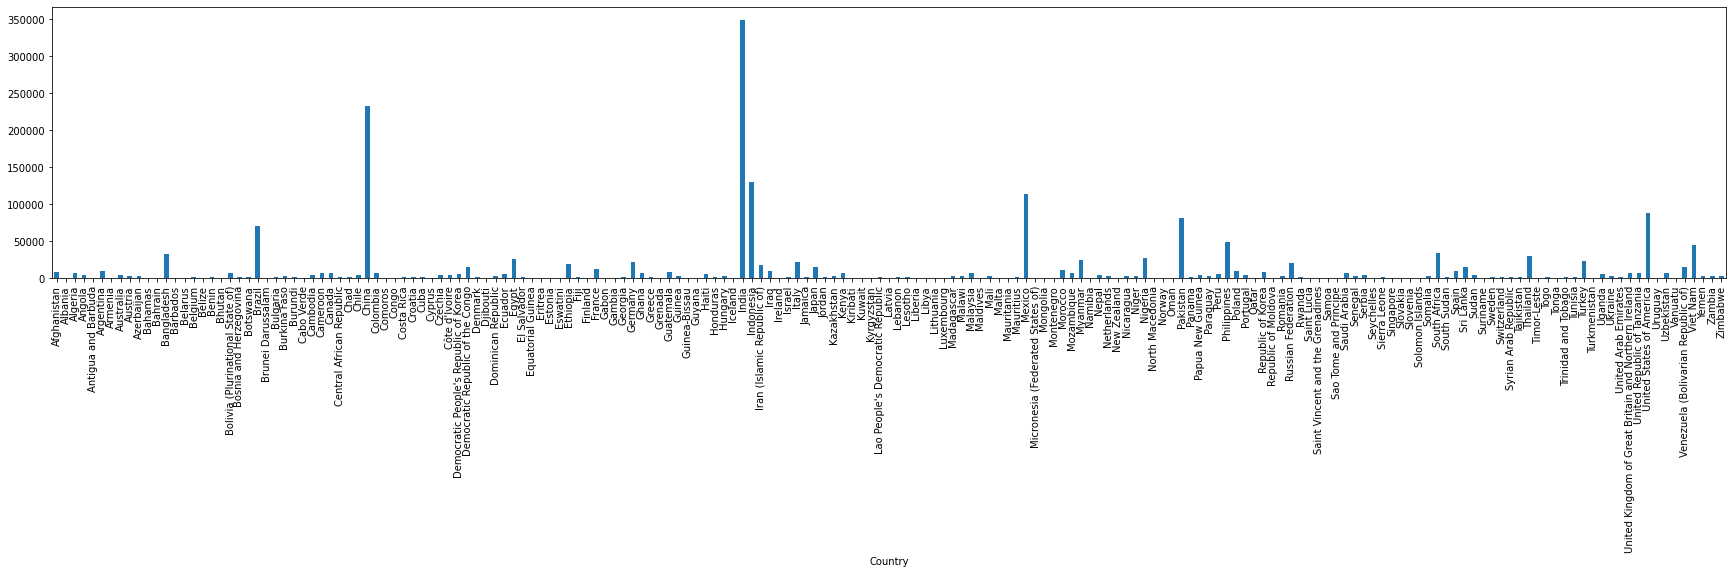

In [34]:
plt.figure(figsize=(30,5))
df_rearanged_pivot.xs((2019, "Diabetes mellitus"), level=[1, "Causes"])["Both sexes_recent"].plot.bar()

<IPython.core.display.Javascript object>

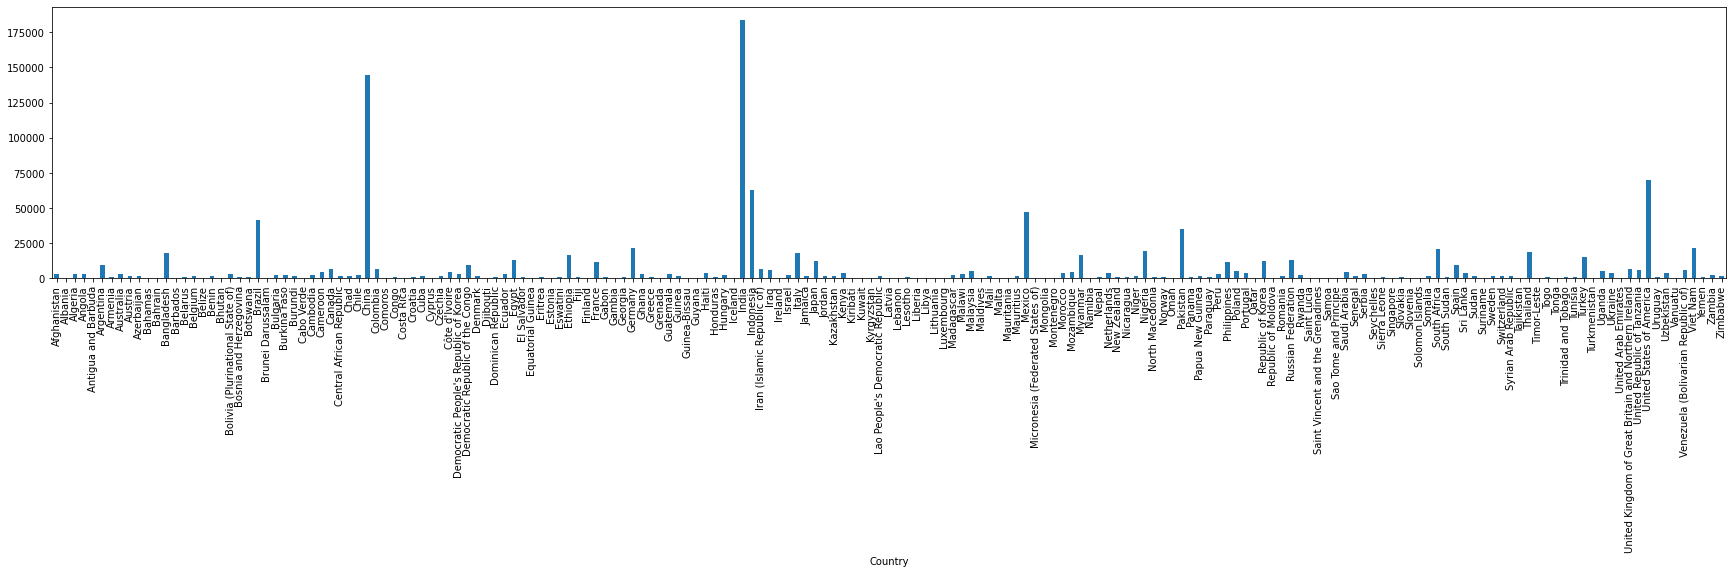

In [35]:
plt.figure(figsize=(30,5))
df_rearanged_pivot.xs((2000, "Diabetes mellitus"), level=[1, "Causes"])["Both sexes_recent"].plot.bar()

# GDP DATA

In [36]:
df_gdp = pd.read_csv("/content/Metadata_Country_API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv")

<IPython.core.display.Javascript object>

In [37]:
df_gdp

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,nan
1,AFG,South Asia,Low income,NaN,Afghanistan,nan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,nan
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,nan
4,AND,Europe & Central Asia,High income,NaN,Andorra,nan
...,...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,nan
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep.",nan
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,nan
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,nan


## MISSING VALUES

In [38]:
df_gdp.isnull().sum()

Country Code      0
Region           46
IncomeGroup      46
SpecialNotes    169
TableName         0
Unnamed: 5      263
dtype: int64

In [39]:
for i in df_gdp.columns:
  print(df_gdp[i].value_counts(dropna =False))
  print("*-"*20)

DZA    1
EAR    1
CYP    1
BHS    1
EGY    1
      ..
PSE    1
TCA    1
CHE    1
KOR    1
NZL    1
Name: Country Code, Length: 263, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Europe & Central Asia         58
Sub-Saharan Africa            48
NaN                           46
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
High income            82
Upper middle income    56
Lower middle income    50
NaN                    46
Low income             29
Name: IncomeGroup, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
NaN                                                                                                                                                                                                                                                                                    

In [40]:
df_gdp.dropna(axis=1,how="all",inplace=True)

In [42]:
df_gdp.dropna(axis=0,how="all",)#inplace=True)

In [43]:
df_gdp.drop(df_gdp.columns[3], axis=1, inplace=True)
df_gdp

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,Kosovo
259,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


In [44]:
df_gdp.isnull().sum()

Country Code     0
Region          46
IncomeGroup     46
TableName        0
dtype: int64

In [45]:
df_gdp[df_gdp["Region"].isnull() | df_gdp["IncomeGroup"].isnull()]#.shape[0]

,Country Code,Region,IncomeGroup,TableName
5,ARB,NaN,NaN,Arab World
34,CEB,NaN,NaN,Central Europe and the Baltics
47,CSS,NaN,NaN,Caribbean small states
59,EAP,NaN,NaN,East Asia & Pacific (excluding high income)
60,EAR,NaN,NaN,Early-demographic dividend
61,EAS,NaN,NaN,East Asia & Pacific
62,ECA,NaN,NaN,Europe & Central Asia (excluding high income)
63,ECS,NaN,NaN,Europe & Central Asia
66,EMU,NaN,NaN,Euro area
71,EUU,NaN,NaN,European Union


In [46]:
df_gdp.dropna(inplace=True)

df_gdp

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,Kosovo
259,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


## MERGE

In [47]:
df_rearanged.merge(df_gdp,how="inner", left_on="Country", right_on="TableName")

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max,Country Code,Region,IncomeGroup,TableName
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439,AFG,South Asia,Low income,Afghanistan
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817,AFG,South Asia,Low income,Afghanistan
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444,AFG,South Asia,Low income,Afghanistan
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881,AFG,South Asia,Low income,Afghanistan
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948,AFG,South Asia,Low income,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12715,Zimbabwe,2001,Chronic respiratory diseases,1884,1044,3046,996,603,1513,887,441,1533,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
12716,Zimbabwe,2000,Malignant neoplasms,7474,4592,11441,3838,2512,5647,3636,2080,5794,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
12717,Zimbabwe,2000,Diabetes mellitus,2039,1227,3219,810,507,1246,1229,720,1972,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
12718,Zimbabwe,2000,Cardiovascular diseases,10368,6335,16076,4425,2818,6837,5943,3516,9239,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe


In [48]:
df_rearanged.shape

(14640, 12)

In [49]:
df_rearanged.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gree

In [50]:
df_gdp.TableName.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faroe Islands',
       'M

### FIND THE MISMATCHES

In [51]:
def mismatch (onlynumber = False, only_out=True):
  out_num = 0
  for i in df_rearanged.Country.unique():
    if sum(df_gdp.TableName.unique() == i):
      if not onlynumber:
        if not only_out:
          print("in :",i)
    else:
      if not onlynumber:
        print("out :",i)
      out_num += 1
  print(f"{out_num} mismatch(es) between those dataframes".upper())

In [52]:
mismatch(only_out=True)

out : Bahamas
out : Bolivia (Plurinational State of)
out : Congo
out : Czechia
out : Democratic People's Republic of Korea
out : Democratic Republic of the Congo
out : Egypt
out : Gambia
out : Iran (Islamic Republic of)
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Micronesia (Federated States of)
out : Republic of Korea
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : Sao Tome and Principe
out : Slovakia
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Venezuela (Bolivarian Republic of)
out : Viet Nam
out : Yemen
24 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [53]:
df_gdp.TableName.str.split(",")

0             [Aruba]
1       [Afghanistan]
2            [Angola]
3           [Albania]
4           [Andorra]
            ...      
258          [Kosovo]
259    [Yemen,  Rep.]
260    [South Africa]
261          [Zambia]
262        [Zimbabwe]
Name: TableName, Length: 217, dtype: object

In [54]:
df_gdp.TableName.str.split(",")[0][0]

'Aruba'

In [55]:
df_gdp.TableName.transform(lambda x : x.split(",")[0])

0             Aruba
1       Afghanistan
2            Angola
3           Albania
4           Andorra
           ...     
258          Kosovo
259           Yemen
260    South Africa
261          Zambia
262        Zimbabwe
Name: TableName, Length: 217, dtype: object

In [56]:
df_gdp["TableName"] = df_gdp.TableName.transform(lambda x : x.split(",")[0])

In [57]:
df_rearanged.merge(df_gdp,how="inner", left_on="Country", right_on="TableName")

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max,Country Code,Region,IncomeGroup,TableName
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439,AFG,South Asia,Low income,Afghanistan
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817,AFG,South Asia,Low income,Afghanistan
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444,AFG,South Asia,Low income,Afghanistan
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881,AFG,South Asia,Low income,Afghanistan
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948,AFG,South Asia,Low income,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,Zimbabwe,2001,Chronic respiratory diseases,1884,1044,3046,996,603,1513,887,441,1533,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
13196,Zimbabwe,2000,Malignant neoplasms,7474,4592,11441,3838,2512,5647,3636,2080,5794,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
13197,Zimbabwe,2000,Diabetes mellitus,2039,1227,3219,810,507,1246,1229,720,1972,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
13198,Zimbabwe,2000,Cardiovascular diseases,10368,6335,16076,4425,2818,6837,5943,3516,9239,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe


In [58]:
mismatch(True)

19 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [59]:
mismatch()

out : Bolivia (Plurinational State of)
out : Czechia
out : Democratic People's Republic of Korea
out : Democratic Republic of the Congo
out : Iran (Islamic Republic of)
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Micronesia (Federated States of)
out : Republic of Korea
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : Sao Tome and Principe
out : Slovakia
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Venezuela (Bolivarian Republic of)
out : Viet Nam
19 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [60]:
df_gdp[df_gdp.TableName == "Korea"]

,Country Code,Region,IncomeGroup,TableName
123,KOR,East Asia & Pacific,High income,Korea
190,PRK,East Asia & Pacific,Low income,Korea


In [61]:
df_gdp.loc[(df_gdp.TableName == "Korea") & (df_gdp["Country Code"] == "KOR"), "TableName" ] = "Republic of Korea"

df_gdp.loc[(df_gdp.TableName == "Korea") & (df_gdp["Country Code"] == "PRK"), "TableName" ] = "Democratic People's Republic of Korea"

In [62]:
mismatch()

out : Bolivia (Plurinational State of)
out : Czechia
out : Democratic Republic of the Congo
out : Iran (Islamic Republic of)
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Micronesia (Federated States of)
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : Sao Tome and Principe
out : Slovakia
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Venezuela (Bolivarian Republic of)
out : Viet Nam
17 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [63]:
df_rearanged.Country.nunique()

183

In [64]:
df_gdp.TableName.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faroe Islands', 'Micronesia',
       'Gabon', 'United Kingdom', 'Georgia',

In [65]:
df_rearanged["Country"] =  df_rearanged.Country.transform(lambda x : x.split("(")[0].strip())

In [66]:
mismatch()

out : Czechia
out : Democratic Republic of the Congo
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : Sao Tome and Principe
out : Slovakia
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
13 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [67]:
df_gdp[df_gdp.TableName.str.contains("Slovak")]

,Country Code,Region,IncomeGroup,TableName
218,SVK,Europe & Central Asia,High income,Slovak Republic


In [68]:
df_gdp.loc[df_gdp.TableName.str.contains("Slovak"), "TableName"] = "Slovakia"

In [69]:
mismatch()

out : Czechia
out : Democratic Republic of the Congo
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : Sao Tome and Principe
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
12 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [ ]:
Czechia,
Democratic Republic of the Congo,
Kyrgyzstan,
Lao People's Democratic Republic,
Republic of Moldova,
Saint Vincent and the Grenadines,
Sao Tome and Principe,
United Kingdom of Great Britain and Northern Ireland,
United Republic of Tanzania,
Viet Nam

In [70]:
df_gdp[df_gdp.TableName.str.contains("Sao")]

,Country Code,Region,IncomeGroup,TableName


In [71]:
df_gdp[df_gdp.TableName.str.contains("Prin")]

,Country Code,Region,IncomeGroup,TableName
216,STP,Sub-Saharan Africa,Lower middle income,São Tomé and Principe


In [72]:
df_gdp.loc[df_gdp.TableName.str.contains("Prin"), "TableName"] = "Sao Tome and Principe"

In [73]:
mismatch(True)

11 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [74]:
df_gdp[df_gdp.TableName.str.contains("Congo")]

,Country Code,Region,IncomeGroup,TableName
41,COD,Sub-Saharan Africa,Low income,Congo
42,COG,Sub-Saharan Africa,Lower middle income,Congo


In [75]:
df_gdp.loc[((df_gdp.TableName.str.contains("Congo")) & (df_gdp["Country Code"] == "COD")), "TableName"] = "Democratic Republic of the Congo"

In [76]:
mismatch()

out : Czechia
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
10 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [77]:
df_gdp[df_gdp.TableName.str.contains("Lucia")]

,Country Code,Region,IncomeGroup,TableName
130,LCA,Latin America & Caribbean,Upper middle income,St. Lucia


In [78]:
df_gdp.loc[df_gdp.TableName.str.contains("Lucia"), "TableName"] = "Saint Lucia"

In [79]:
mismatch()

out : Czechia
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Vincent and the Grenadines
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
9 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [80]:
def finder(value = ""):
  if df_gdp.TableName.str.contains(value).sum():
    print(df_gdp[df_gdp.TableName.str.contains(value)])
  return df_rearanged[df_rearanged["Country"].str.contains(value)]["Country"].values[0]

In [81]:
finder("Czec")

   Country Code                 Region  IncomeGroup       TableName
52          CZE  Europe & Central Asia  High income  Czech Republic


'Czechia'

In [82]:
def changer(last_val ="", first_val=""):
  df_gdp.loc[df_gdp.TableName.str.contains(first_val), "TableName"] = last_val

In [83]:
changer(last_val=finder("Czec"),first_val="Czec")

   Country Code                 Region  IncomeGroup       TableName
52          CZE  Europe & Central Asia  High income  Czech Republic


In [84]:
mismatch()

out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Vincent and the Grenadines
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
8 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [85]:
finder("Kyrg")

    Country Code                 Region          IncomeGroup        TableName
119          KGZ  Europe & Central Asia  Lower middle income  Kyrgyz Republic


'Kyrgyzstan'

In [89]:
changer(finder("Kyrg"), "Kyrg")

    Country Code                 Region          IncomeGroup        TableName
119          KGZ  Europe & Central Asia  Lower middle income  Kyrgyz Republic


In [90]:
mismatch()

out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Vincent and the Grenadines
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
7 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [91]:
changer(finder("Lao"), "Lao")

    Country Code               Region          IncomeGroup TableName
126          LAO  East Asia & Pacific  Lower middle income   Lao PDR


In [92]:
mismatch()

out : Republic of Moldova
out : Saint Vincent and the Grenadines
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
6 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [93]:
changer(finder("Moldova"), "Moldova")

    Country Code                 Region          IncomeGroup TableName
147          MDA  Europe & Central Asia  Lower middle income   Moldova


In [94]:
mismatch()

out : Saint Vincent and the Grenadines
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
5 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [95]:
changer(finder("Vincent"), "Vincent ")
mismatch()

    Country Code  ...                       TableName
250          VCT  ...  St. Vincent and the Grenadines

[1 rows x 4 columns]
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
4 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [99]:
changer(finder("Kingdom"), "Kingdom") #graat britain didnt work
mismatch()

   Country Code  ...                                          TableName
79          GBR  ...  United Kingdom of Great Britain and Northern I...

[1 rows x 4 columns]
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
3 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [102]:
changer(finder("Tanz"), "Tanz") 
mismatch()

    Country Code  ...                    TableName
243          TZA  ...  United Republic of Tanzania

[1 rows x 4 columns]
out : Viet Nam
1 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [103]:
changer(finder("State"), "State")
mismatch() 

    Country Code         Region  IncomeGroup                 TableName
248          USA  North America  High income  United States of America
out : Viet Nam
1 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [104]:
changer(finder("Viet"), "Viet")
mismatch() 

    Country Code               Region          IncomeGroup TableName
254          VNM  East Asia & Pacific  Lower middle income   Vietnam
0 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [105]:
mismatch(only_out=False)

in : Afghanistan
in : Albania
in : Algeria
in : Angola
in : Antigua and Barbuda
in : Argentina
in : Armenia
in : Australia
in : Austria
in : Azerbaijan
in : Bahamas
in : Bahrain
in : Bangladesh
in : Barbados
in : Belarus
in : Belgium
in : Belize
in : Benin
in : Bhutan
in : Bolivia
in : Bosnia and Herzegovina
in : Botswana
in : Brazil
in : Brunei Darussalam
in : Bulgaria
in : Burkina Faso
in : Burundi
in : Cabo Verde
in : Cambodia
in : Cameroon
in : Canada
in : Central African Republic
in : Chad
in : Chile
in : China
in : Colombia
in : Comoros
in : Congo
in : Costa Rica
in : Côte d'Ivoire
in : Croatia
in : Cuba
in : Cyprus
in : Czechia
in : Democratic People's Republic of Korea
in : Democratic Republic of the Congo
in : Denmark
in : Djibouti
in : Dominican Republic
in : Ecuador
in : Egypt
in : El Salvador
in : Equatorial Guinea
in : Eritrea
in : Estonia
in : Eswatini
in : Ethiopia
in : Fiji
in : Finland
in : France
in : Gabon
in : Gambia
in : Georgia
in : Germany
in : Ghana
in : Greece


# REMERGE

In [106]:
df_rearanged.merge(df_gdp,how="inner", left_on="Country", right_on="TableName")

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max,Country Code,Region,IncomeGroup,TableName
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439,AFG,South Asia,Low income,Afghanistan
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817,AFG,South Asia,Low income,Afghanistan
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444,AFG,South Asia,Low income,Afghanistan
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881,AFG,South Asia,Low income,Afghanistan
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948,AFG,South Asia,Low income,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,Zimbabwe,2001,Chronic respiratory diseases,1884,1044,3046,996,603,1513,887,441,1533,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
14636,Zimbabwe,2000,Malignant neoplasms,7474,4592,11441,3838,2512,5647,3636,2080,5794,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
14637,Zimbabwe,2000,Diabetes mellitus,2039,1227,3219,810,507,1246,1229,720,1972,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
14638,Zimbabwe,2000,Cardiovascular diseases,10368,6335,16076,4425,2818,6837,5943,3516,9239,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe


In [107]:
df_rearanged.shape

(14640, 12)

In [108]:
df_merged = df_rearanged.merge(df_gdp,how="inner", left_on="Country", right_on="TableName")

In [110]:
df_merged.drop("TableName", axis=1,)# inplace=True)

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max,Country Code,Region,IncomeGroup
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439,AFG,South Asia,Low income
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817,AFG,South Asia,Low income
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444,AFG,South Asia,Low income
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881,AFG,South Asia,Low income
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948,AFG,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,Zimbabwe,2001,Chronic respiratory diseases,1884,1044,3046,996,603,1513,887,441,1533,ZWE,Sub-Saharan Africa,Lower middle income
14636,Zimbabwe,2000,Malignant neoplasms,7474,4592,11441,3838,2512,5647,3636,2080,5794,ZWE,Sub-Saharan Africa,Lower middle income
14637,Zimbabwe,2000,Diabetes mellitus,2039,1227,3219,810,507,1246,1229,720,1972,ZWE,Sub-Saharan Africa,Lower middle income
14638,Zimbabwe,2000,Cardiovascular diseases,10368,6335,16076,4425,2818,6837,5943,3516,9239,ZWE,Sub-Saharan Africa,Lower middle income


# INCOME VS DISEASE

In [128]:
df_merged.groupby(by=["IncomeGroup","Causes"])[["Male_recent"]].mean()

Male_recent
IncomeGroup         Causes                                   
High income         Cardiovascular diseases            29,623
                    Chronic respiratory diseases        6,723
                    Diabetes mellitus                   2,212
                    Malignant neoplasms                26,079
Low income          Cardiovascular diseases            12,442
                    Chronic respiratory diseases        2,417
                    Diabetes mellitus                   1,681
                    Malignant neoplasms                 3,884
Lower middle income Cardiovascular diseases            51,360
                    Chronic respiratory diseases       16,607
                    Diabetes mellitus                   5,888
                    Malignant neoplasms                16,550
Upper middle income Cardiovascular diseases            73,388
                    Chronic respiratory diseases       17,898
                    Diabetes mellitus                   5,552
                    Malignant neoplasms                42,124

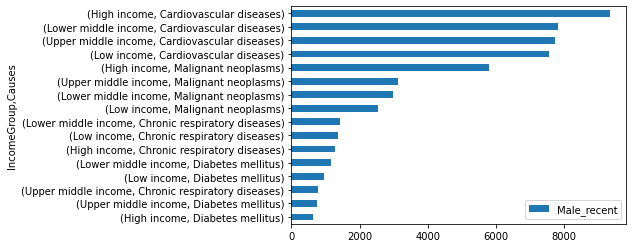

In [127]:
df_merged.groupby(by=["IncomeGroup","Causes"])[["Male_recent"]].median().sort_values("Male_recent").plot.barh()

* In context of income we could say that a higher income-Male has higher risk in Cardiovascular diseases

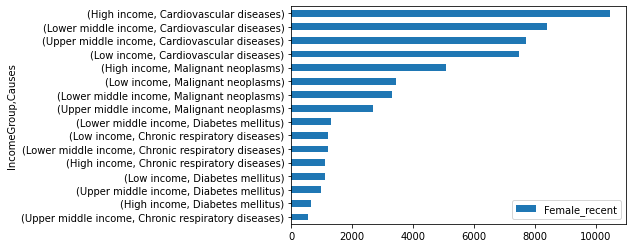

In [130]:
df_merged.groupby(by=["IncomeGroup","Causes"])[["Female_recent"]].median().sort_values("Female_recent").plot.barh()

* we could say that females are more prone to Cardiovascular diseases and also interms of income same as males 

In [133]:
df_merged_pivot = pd.pivot_table(df_merged,values= ['Both sexes_recent', 'Both sexes_min', 'Both sexes_max', 'Male_recent',
       'Male_min', 'Male_max', 'Female_recent', 'Female_min', 'Female_max'], index=['IncomeGroup','Region','Country', 'Year', 'Causes'])

<IPython.core.display.Javascript object>

In [134]:
df_merged_pivot

Both sexes_max  ...  Male_recent
IncomeGroup         Region              Country      Year Causes                                        ...             
High income         East Asia & Pacific Australia    2000 Cardiovascular diseases                54254  ...        22658
                                                          Chronic respiratory diseases            9984  ...         4813
                                                          Diabetes mellitus                       3391  ...         1548
                                                          Malignant neoplasms                    40612  ...        19947
                                                     2001 Cardiovascular diseases                53925  ...        22552
...                                                                                                ...  ...          ...
Upper middle income Sub-Saharan Africa  South Africa 2018 Malignant neoplasms                    72458  ...        28635
                                                     2019 Cardiovascular diseases               107835  ...        42630
                                                          Chronic respiratory diseases           25492  ...        10966
                                                          Diabetes mellitus                      42803  ...        15327
                                                          Malignant neoplasms                    73325  ...        28530

[14640 rows x 9 columns]

In [138]:
df_merged_pivot.to_excel("income_disease_by_year.xlsx")